### Data extraction
Extract data from MIMIC-III

In [1]:
import time
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

# import re

# import plotly.graph_objs as go
# import plotly.plotly as py
import cufflinks
# from IPython.core.interactiveshell import InteractiveShell
# import plotly.figure_factory as ff
# InteractiveShell.ast_node_interactivity = 'all'
# from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

In [2]:
# Import pandas 
import pandas as pd 

start = time.time()
# reading csv file 
admissions_df = pd.read_csv("datasets/mmc-3/ADMISSIONS.csv")
noteevents_df = pd.read_csv("datasets/mmc-3/NOTEEVENTS.csv") 
end = time.time()
print(end - start)


/home/evan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.



39.947840213775635


In [3]:
# diagnosis = df.DIAGNOSIS.unique()
# #PNEUMONIA
# for i in diagnosis:
#     print(f"[{i}]")
# data = df.copy()
# data.info()

# pneumonia_df = data.loc[df['DIAGNOSIS'] == 'PNEUMONIA']
# pneumonia_df.info()

In [4]:
admissions_df

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58971,58594,98800,191113,2131-03-30 21:13:00,2131-04-02 15:02:00,NaN,EMERGENCY,CLINIC REFERRAL/PREMATURE,HOME,Private,ENGL,NOT SPECIFIED,SINGLE,WHITE,2131-03-30 19:44:00,2131-03-30 22:41:00,TRAUMA,0,1
58972,58595,98802,101071,2151-03-05 20:00:00,2151-03-06 09:10:00,2151-03-06 09:10:00,EMERGENCY,CLINIC REFERRAL/PREMATURE,DEAD/EXPIRED,Medicare,ENGL,CATHOLIC,WIDOWED,WHITE,2151-03-05 17:23:00,2151-03-05 21:06:00,SAH,1,1
58973,58596,98805,122631,2200-09-12 07:15:00,2200-09-20 12:08:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Private,ENGL,NOT SPECIFIED,MARRIED,WHITE,NaN,NaN,RENAL CANCER/SDA,0,1
58974,58597,98813,170407,2128-11-11 02:29:00,2128-12-22 13:11:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,SNF,Private,ENGL,CATHOLIC,MARRIED,WHITE,2128-11-10 23:48:00,2128-11-11 03:16:00,S/P FALL,0,0


In [5]:
noteevents_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2083180 entries, 0 to 2083179
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   ROW_ID       int64  
 1   SUBJECT_ID   int64  
 2   HADM_ID      float64
 3   CHARTDATE    object 
 4   CHARTTIME    object 
 5   STORETIME    object 
 6   CATEGORY     object 
 7   DESCRIPTION  object 
 8   CGID         float64
 9   ISERROR      float64
 10  TEXT         object 
dtypes: float64(3), int64(2), object(6)
memory usage: 174.8+ MB


In [6]:
admissions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58976 entries, 0 to 58975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ROW_ID                58976 non-null  int64 
 1   SUBJECT_ID            58976 non-null  int64 
 2   HADM_ID               58976 non-null  int64 
 3   ADMITTIME             58976 non-null  object
 4   DISCHTIME             58976 non-null  object
 5   DEATHTIME             5854 non-null   object
 6   ADMISSION_TYPE        58976 non-null  object
 7   ADMISSION_LOCATION    58976 non-null  object
 8   DISCHARGE_LOCATION    58976 non-null  object
 9   INSURANCE             58976 non-null  object
 10  LANGUAGE              33644 non-null  object
 11  RELIGION              58518 non-null  object
 12  MARITAL_STATUS        48848 non-null  object
 13  ETHNICITY             58976 non-null  object
 14  EDREGTIME             30877 non-null  object
 15  EDOUTTIME             30877 non-null

In [7]:
# https://towardsdatascience.com/left-join-with-pandas-data-frames-in-python-c29c85089ba4
# left_join = noteevents_df.join(admissions_df.set_index('HADM_ID'), on='HADM_ID')
# left_join = noteevents_df.set_index('HADM_ID').join(admissions_df.set_index('HADM_ID'))
"""
>>> left
  transaction_id user_id     value
0              A   Peter  1.867558
1              B    John -0.977278
2              C    John  0.950088
3              D    Anna -0.151357
>>> right
  user_id favorite_color
0    Paul           blue
1    Mary           blue
2    John            red
3    Anna            NaN

---------
>>> left.merge(right, on='user_id', how='left', indicator=True)
  transaction_id user_id     value favorite_color     _merge
0              A   Peter  1.867558            NaN  left_only
1              B    John -0.977278            red       both
2              C    John  0.950088            red       both
3              D    Anna -0.151357            NaN       both

---------
left.merge(right.rename({'user_id': 'user_id_r'}, axis=1),
               left_on='user_id', right_on='user_id_r', how='left')
               
  transaction_id user_id     value user_id_r favorite_color
0              A   Peter  1.867558       NaN            NaN
1              B    John -0.977278      John            red
2              C    John  0.950088      John            red
3              D    Anna -0.151357      Anna            NaN
---------
select
    t.transaction_id
    , t.user_id
    , t.value
    , u.user_id as user_id_r
    , u.favorite_color
from
    transactions t
    left join
    users u
    on t.user_id = u.user_id
;
"""

"\n>>> left\n  transaction_id user_id     value\n0              A   Peter  1.867558\n1              B    John -0.977278\n2              C    John  0.950088\n3              D    Anna -0.151357\n>>> right\n  user_id favorite_color\n0    Paul           blue\n1    Mary           blue\n2    John            red\n3    Anna            NaN\n\n---------\n>>> left.merge(right, on='user_id', how='left', indicator=True)\n  transaction_id user_id     value favorite_color     _merge\n0              A   Peter  1.867558            NaN  left_only\n1              B    John -0.977278            red       both\n2              C    John  0.950088            red       both\n3              D    Anna -0.151357            NaN       both\n\n---------\nleft.merge(right.rename({'user_id': 'user_id_r'}, axis=1),\n               left_on='user_id', right_on='user_id_r', how='left')\n               \n  transaction_id user_id     value user_id_r favorite_color\n0              A   Peter  1.867558       NaN            Na

In [8]:
start = time.time()
# Left join of two dataframes
note_admiss_df_left = noteevents_df.merge(admissions_df, on='HADM_ID', how='left', indicator=True)
end = time.time()
print(end - start)

8.065443515777588


In [9]:
note_admiss_df_left.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2083180 entries, 0 to 2083179
Data columns (total 30 columns):
 #   Column                Dtype   
---  ------                -----   
 0   ROW_ID_x              int64   
 1   SUBJECT_ID_x          int64   
 2   HADM_ID               float64 
 3   CHARTDATE             object  
 4   CHARTTIME             object  
 5   STORETIME             object  
 6   CATEGORY              object  
 7   DESCRIPTION           object  
 8   CGID                  float64 
 9   ISERROR               float64 
 10  TEXT                  object  
 11  ROW_ID_y              float64 
 12  SUBJECT_ID_y          float64 
 13  ADMITTIME             object  
 14  DISCHTIME             object  
 15  DEATHTIME             object  
 16  ADMISSION_TYPE        object  
 17  ADMISSION_LOCATION    object  
 18  DISCHARGE_LOCATION    object  
 19  INSURANCE             object  
 20  LANGUAGE              object  
 21  RELIGION              object  
 22  MARITAL_STATUS    

In [10]:
note_admiss_df_left.shape

(2083180, 30)

In [11]:
# df1 = df[['a','b']]
note_admiss_df_left[['DIAGNOSIS', 'SUBJECT_ID_x', 'SUBJECT_ID_y','DESCRIPTION', 'CATEGORY']]

,DIAGNOSIS,SUBJECT_ID_x,SUBJECT_ID_y,DESCRIPTION,CATEGORY
0,RT LOWER LOBE PNEUMONIA,22532,22532.0,Report,Discharge summary
1,CHRONIC OBSTRUCTIVE PULMONARY DISEASE,13702,13702.0,Report,Discharge summary
2,TRACHEALBRONCHEAL MALACEA/SDA,13702,13702.0,Report,Discharge summary
3,ASTHMA;COPD EXACERBATION,13702,13702.0,Report,Discharge summary
4,S/P FALL;TELEMETRY,26880,26880.0,Report,Discharge summary
...,...,...,...,...,...
2083175,NEWBORN,31097,31097.0,Report,Nursing/other
2083176,NEWBORN,31097,31097.0,Report,Nursing/other
2083177,NEWBORN,31097,31097.0,Report,Nursing/other
2083178,NEWBORN,31097,31097.0,Report,Nursing/other


In [12]:
pneumonia_df = note_admiss_df_left.loc[note_admiss_df_left["DIAGNOSIS"] == 'PNEUMONIA', ['ROW_ID_x', 'SUBJECT_ID_x', 'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HAS_CHARTEVENTS_DATA']]

In [13]:
pneumonia_df.shape

(59727, 17)

In [14]:
pneumonia_df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in noteevents')

In [15]:
#pneumonia_no_disch_df = pneumonia_df.loc[pneumonia_df["CATEGORY"] != 'Discharge summary', ['ROW_ID_x', 'SUBJECT_ID_x', 'HADM_ID', 'CHARTDATE', 'CHARTTIME', 'STORETIME', 'CATEGORY', 'DESCRIPTION', 'CGID', 'ISERROR', 'TEXT', 'ADMITTIME', 'DISCHTIME', 'DEATHTIME', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HAS_CHARTEVENTS_DATA']]
pneumonia_no_disch_df = pneumonia_df.loc[pneumonia_df["CATEGORY"] != 'Discharge summary', ['ROW_ID_x','SUBJECT_ID_x','CHARTDATE','STORETIME','CATEGORY','DESCRIPTION','TEXT', 'DEATHTIME']]

In [16]:
pneumonia_no_disch_df['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in noteevents')

In [17]:
pneumonia_no_disch_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58029 entries, 59103 to 2066669
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ROW_ID_x      58029 non-null  int64 
 1   SUBJECT_ID_x  58029 non-null  int64 
 2   CHARTDATE     58029 non-null  object
 3   STORETIME     40888 non-null  object
 4   CATEGORY      58029 non-null  object
 5   DESCRIPTION   58029 non-null  object
 6   TEXT          58029 non-null  object
 7   DEATHTIME     11895 non-null  object
dtypes: int64(2), object(6)
memory usage: 4.0+ MB


In [18]:
pneumonia_no_disch_df.shape

(58029, 8)

In [19]:
pneumonia_alive_no_disch = pneumonia_no_disch_df[pneumonia_no_disch_df.DEATHTIME.isnull()]
pneumonia_dead_no_disch = pneumonia_no_disch_df[pneumonia_no_disch_df.DEATHTIME.notnull()]

In [20]:
pneumonia_dead_no_disch.shape

(11895, 8)

In [21]:
pneumonia_alive_no_disch.shape

(46134, 8)

In [22]:
pneumonia_alive_no_disch = pneumonia_alive_no_disch.sort_values(by=['SUBJECT_ID_x','CHARTDATE', 'ROW_ID_x'])
pneumonia_dead_no_disch = pneumonia_dead_no_disch.sort_values(by=['SUBJECT_ID_x','CHARTDATE', 'ROW_ID_x'])

In [23]:
pneumonia_alive_no_disch['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in pneumonia alive')

In [24]:
pneumonia_dead_no_disch['CATEGORY'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of notes', 
                                                                title='Number of category kinds in pneumonia alive')

In [25]:
pneumonia_alive_no_disch

,ROW_ID_x,SUBJECT_ID_x,CHARTDATE,STORETIME,CATEGORY,DESCRIPTION,TEXT,DEATHTIME
137480,149869,68,2173-12-15,NaN,ECG,Report,Sinus tachycardia. Compared to the previous tr...,NaN
137481,149870,68,2173-12-15,NaN,ECG,Report,Sinus rhythm. Delayed anterior precordial R wa...,NaN
1259578,1261173,68,2173-12-16,2173-12-16 05:09:00,Nursing/other,Report,Micu nsg admission note\n41yo female with AIDS...,NaN
1259579,1261174,68,2173-12-16,2173-12-16 17:08:00,Nursing/other,Report,NSG 0700-1900\nEvents: Attempted eating breakf...,NaN
1258821,1261175,68,2173-12-16,2173-12-16 17:18:00,Nursing/other,Report,Resp Care\n\nSputum induction obtained for PCP...,NaN
...,...,...,...,...,...,...,...,...
1129253,1138542,99937,2128-05-11,NaN,Radiology,CHEST (PORTABLE AP),[**2128-5-11**] 11:57 AM\n CHEST (PORTABLE AP)...,NaN
1129150,1138569,99937,2128-05-11,NaN,Radiology,"CTA CHEST W&W/O C&RECONS, NON-CORONARY",[**2128-5-11**] 1:44 PM\n CTA CHEST W&W/O C&RE...,NaN
148040,130595,99937,2128-05-12,NaN,ECG,Report,Normal sinus rhythm. Compared to tracing #1 no...,NaN
1129514,1138666,99937,2128-05-12,NaN,Radiology,CHEST (PORTABLE AP),[**2128-5-12**] 7:27 AM\n CHEST (PORTABLE AP) ...,NaN


In [26]:
# Number of patients
pneumonia_dead_no_disch['SUBJECT_ID_x'].nunique()

252

In [27]:
# Number of patients
pneumonia_alive_no_disch['SUBJECT_ID_x'].nunique()

1167

In [28]:
# import text handling tool
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from collections import Counter

import sys
import re
import csv
import os.path

# define constants
# RESULT_HEADER = "WORD, FREQUENCY\n"
MIN_SEQ_LEN = 4
USE_1_N_SEQ = 2


# words that do not have meaning (can be modified later)
USELESS_WORDS = ["a", "the", "he", "she", ",", ".", "?", "!", ":", ";", "+", "*", "**"\
                 "your", "you"]

# count up the frequency of every word in every disease file
stemmer = PorterStemmer()
# create set of words to ignore in text
stop_words = set(stopwords.words('english'))

for word in USELESS_WORDS:
    stop_words.add(word)

In [29]:

#----------
def count_notes_per_patient(disease_df):
    patient_id_to_num_notes = {}
    patient_id = -1
    note_counter = 0
            
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        patient_id_check = int(row['SUBJECT_ID_x'])
                
        if not patient_id == patient_id_check:
            patient_id_to_num_notes[patient_id] = note_counter
            note_counter = 1
        else:
            note_counter += 1
                    
        patient_id = patient_id_check
                
    patient_id_to_num_notes[patient_id] = note_counter
    del patient_id_to_num_notes[-1]
    return patient_id_to_num_notes

patient_id_to_num_notes = {}
patient_id_to_num_notes['pneumonia_dead'] = count_notes_per_patient(pneumonia_dead_no_disch)
patient_id_to_num_notes['pneumonia_alive'] = count_notes_per_patient(pneumonia_alive_no_disch)

100%|██████████| 46134/46134 [00:06<00:00, 7388.68it/s]


In [30]:
patient_id_to_num_notes

{'pneumonia_dead': {111: 12,
  346: 25,
  404: 3,
  546: 6,
  618: 16,
  705: 15,
  726: 48,
  1039: 55,
  1556: 37,
  1872: 3,
  1944: 56,
  2286: 69,
  2990: 166,
  3055: 29,
  3099: 13,
  3201: 8,
  3526: 7,
  3773: 6,
  3881: 20,
  4122: 51,
  4754: 101,
  4811: 21,
  5476: 1,
  5494: 22,
  5774: 104,
  5786: 152,
  5913: 1,
  6133: 68,
  6735: 13,
  6745: 13,
  6973: 36,
  6981: 8,
  7277: 66,
  7310: 8,
  7924: 9,
  7977: 9,
  9908: 11,
  9984: 15,
  10302: 100,
  10510: 86,
  10545: 10,
  10642: 10,
  11049: 14,
  11209: 9,
  11395: 41,
  12530: 24,
  12849: 50,
  13098: 46,
  13566: 23,
  14125: 9,
  14514: 96,
  14965: 25,
  15159: 15,
  15251: 11,
  15396: 17,
  15566: 37,
  15853: 45,
  16275: 17,
  16344: 27,
  16622: 51,
  16684: 29,
  17122: 16,
  17354: 5,
  17802: 64,
  17983: 65,
  18094: 23,
  18736: 35,
  18768: 46,
  18848: 205,
  18971: 26,
  19243: 25,
  19323: 6,
  19390: 21,
  19463: 20,
  19535: 59,
  19754: 13,
  19827: 22,
  19833: 58,
  19872: 10,
  20006: 8

In [31]:
print(len(patient_id_to_num_notes['pneumonia_dead']))
print(len(patient_id_to_num_notes['pneumonia_alive']))

252
1167


In [32]:
pneumonia_dead_no_disch.loc[pneumonia_dead_no_disch["SUBJECT_ID_x"] == 111, ['ROW_ID_x','SUBJECT_ID_x','DESCRIPTION','TEXT', 'DEATHTIME']]

,ROW_ID_x,SUBJECT_ID_x,DESCRIPTION,TEXT,DEATHTIME
70391,70124,111,Report,PATIENT/TEST INFORMATION:\nIndication: s/p PEA...,2144-07-01 14:55:00
142529,151749,111,Report,Compared to the previous tracing QRS voltage i...,2144-07-01 14:55:00
142097,151750,111,Report,"Normal sinus rhythm, rate 80. Biatrial abnorm...",2144-07-01 14:55:00
142303,151751,111,Report,Normal sinus rhythm. Q waves in leads V1-V2 c...,2144-07-01 14:55:00
380576,375732,111,Physician Resident Admission Note,Chief Complaint: respiratory distress\n HPI...,2144-07-01 14:55:00
380109,375744,111,ICU Event Note,Clinician: Nurse\n Pt admitted from the ED ...,2144-07-01 14:55:00
379907,375749,111,Physician Resident/Attending Admission Note - ...,Chief Complaint: respiratory distress\n HPI...,2144-07-01 14:55:00
379806,375753,111,Social Work Admission Note,Social Work Initial Note:\n Family Informati...,2144-07-01 14:55:00
379909,375760,111,ICU Event Note,TITLE:\n Clinician: Resident\n Patient ex...,2144-07-01 14:55:00
1066971,1079317,111,CHEST (PORTABLE AP),[**2144-7-1**] 2:43 AM\n CHEST (PORTABLE AP) ...,2144-07-01 14:55:00


In [33]:
# tmp_df = pneumonia_dead_no_disch.loc[pneumonia_dead_no_disch["SUBJECT_ID_x"] == 111, ['DESCRIPTION','TEXT']]
# for index, row in tmp_df.iterrows():
#     print(row['DESCRIPTION'])
#     print(row['TEXT'])
#     print('-'*80)

In [34]:
# row_cnt = 0
# note_cnt = 0
# for index, row in pneumonia_alive_no_disch.iterrows():
#     row_cnt += 1
#     note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
#     tokenized_note = word_tokenize(note)
       
#     if 'money' in tokenized_note :
#         note_cnt += 1
#         print(f"#{row_cnt}) {note_cnt}) {row['ROW_ID_x']} : {row['SUBJECT_ID_x']} ==> [{row['DESCRIPTION']}]")
    
    

In [35]:
# row_cnt = 0
# note_cnt = 0
# for index, row in pneumonia_alive_no_disch.iterrows():
#     row_cnt += 1
#     note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
#     tokenized_note = word_tokenize(note)
    
#     if 'money' in tokenized_note and 'wallet' in tokenized_note:
#         note_cnt += 1
#         print(f"#{row_cnt}) {note_cnt}) {row['ROW_ID_x']} : {row['SUBJECT_ID_x']} ==> [{row['DESCRIPTION']}]")
# #         print(row['TEXT'])
# #         print('-'*80)

In [36]:
def count_words_per_patient(disease_df, patient_id_to_num_notes):
    note_appearance_counter = {}
    number_of_patients = 0 # number of patients
    note_counter = 0

# -----------
    patient_id = -1
    word_set = set()
    note_event_counter = 0

    # Iterate through each note
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):

        
        patient_id_check = int(row['SUBJECT_ID_x'])
    
        # if patient id has changed, end sequence and start new sequence
        if not patient_id == patient_id_check:
            number_of_patients += 1
            note_event_counter = 0
        
            for word in word_set:
                if word in note_appearance_counter:
                    note_appearance_counter[word] += 1
                else:
                    note_appearance_counter[word] = 1

        
            # reset word_set
            word_set = set()
        
        # update patient id
        patient_id = patient_id_check

            
        if patient_id_to_num_notes[patient_id_check] <= MIN_SEQ_LEN:
            continue
            
        if note_event_counter < patient_id_to_num_notes[patient_id] // USE_1_N_SEQ:
            note_event_counter += 1
            continue
                
        note_counter += 1
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        tokenized_note = word_tokenize(note)
        
        
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())
            if not stemmed_word in stop_words:
                word_set.add(stemmed_word)
    
    print(str(note_counter) + " note events")
    print("finished counting frequent words for patients!")
#     return note_counter, note_appearance_counter
    return number_of_patients, note_appearance_counter

# variable dictionaries
number_of_notes = {}
note_appearance_counter = {}

number_of_notes['pneumonia_dead'], note_appearance_counter['pneumonia_dead'] = count_words_per_patient(pneumonia_dead_no_disch, patient_id_to_num_notes['pneumonia_dead'])
number_of_notes['pneumonia_alive'], note_appearance_counter['pneumonia_alive'] = count_words_per_patient(pneumonia_alive_no_disch, patient_id_to_num_notes['pneumonia_alive'])

  0%|          | 12/46134 [00:00<06:56, 110.87it/s]

5989 note events
finished counting frequent words for patients!


100%|██████████| 46134/46134 [02:36<00:00, 294.00it/s]

23172 note events
finished counting frequent words for patients!


In [37]:
number_of_notes

{'pneumonia_dead': 252, 'pneumonia_alive': 1167}

In [38]:
print(note_appearance_counter)

{'pneumonia_dead': {'distend': 108, 'q': 136, 'mix': 30, 'form': 38, 'cvl': 42, 'like': 172, 'hospit': 75, 'set': 141, 'admiss': 88, 'amount': 132, 'non': 170, 'jvp': 18, 'regular': 66, 'visual': 109, 'agenc': 1, 'section': 56, 'weak': 65, 'chest': 206, 'opac': 148, 'consist': 152, 'inquir': 4, 'venou': 99, 'phenylephrin': 16, 'epi': 11, 'dvt': 79, 'pao': 66, 'densiti': 45, 'thi': 230, 'death': 42, 'insert': 61, 'antibiot': 102, 'bolus': 98, 'chang': 222, 'involv': 85, 'post': 131, 'long': 58, 'k': 116, 'effort': 47, 'legal': 10, 'puls': 133, 'small': 184, 'ani': 142, 'transient': 33, 'went': 50, 'aris': 6, 'encourag': 43, 'empir': 36, 'lung': 203, 'nodular': 15, 'ventil': 129, 'care': 171, 'home': 99, 'decid': 61, 'recurr': 33, 'health': 39, 'cardiomediastin': 48, 'femal': 61, 'stomach': 93, 'voltag': 35, 'hco': 15, 'person': 33, 'cage': 1, 'differ': 81, 'replet': 84, 'aspirin': 11, 'bipap': 43, 'intub': 147, 'son': 89, ')': 229, 'offer': 47, 'bs': 138, '<': 77, 'nurs': 141, 'discuss'

In [39]:
# # get hyper-paramters n_fold and threshold from user input
n_fold = float(3)
threshold = float(0.02)

frequent_word_lists = {}
factor = {}

In [40]:
"""function description:
for each disease in note_appearance_counter
    1. checks whether a word in disease file is frequent(frequency standard as defined by factor, n_fold, and threshold)
    2. adds to frequent_word_list
"""

# def find_frequent_word(note_appearance_counter, frequent_word_lists, number_of_notes, factor, n_fold, threshold):

# calculate normalizing factor for each disease
note_sum = 0

# Count from two labels
for disease in number_of_notes:
    note_sum += float(number_of_notes[disease])
    
for disease in number_of_notes:
    factor[disease] = number_of_notes[disease] / note_sum

# determine frequent word for each disease file
for disease in note_appearance_counter:
    frequent_word_lists[disease] = []

    print(disease + " has " + str(len(note_appearance_counter[disease])) + " unique words!")

    for word in note_appearance_counter[disease]:
        
        freq_check = True
        for check_disease in note_appearance_counter:
            
            if not disease == check_disease:
                if word in note_appearance_counter[check_disease]:
                    if not (note_appearance_counter[disease][word] / note_appearance_counter[check_disease][word] / factor[disease] * factor[check_disease] > n_fold \
                        and note_appearance_counter[disease][word] > (number_of_notes[disease] * threshold)):

                        freq_check = False
                        break

                else:
                    if not (note_appearance_counter[disease][word] > n_fold and note_appearance_counter[disease][word] > (number_of_notes[disease] * threshold)):
                        freq_check = False
                        break
        if freq_check:
            frequent_word_lists[disease].append((word))
            # Create a tuple of word and its count
#             frequent_word_lists[disease].append((word, note_appearance_counter[disease][word]))

        

print("finished making frequent words list for " + disease)

pneumonia_dead has 11678 unique words!
pneumonia_alive has 22572 unique words!
finished making frequent words list for pneumonia_alive


In [41]:
print(note_sum)
print(factor)

# number of notes
# 58029.0
# {'pneumonia_dead': 0.2049837150390322, 'pneumonia_alive': 0.7950162849609678}

1419.0
{'pneumonia_dead': 0.17758985200845667, 'pneumonia_alive': 0.8224101479915433}


In [42]:
print(len(frequent_word_lists['pneumonia_dead']))
print(len(frequent_word_lists['pneumonia_alive']))

187
112


In [43]:
print(frequent_word_lists)

{'pneumonia_dead': ['phenylephrin', 'death', 'suffer', 'azotemia', 'refractori', 'arrang', 'recruit', 'anur', 'clergi', 'mottl', 'dic', 'unrespons', 'pea', 'arrest', 'autopeep', 'clinician', 'cpr', 'paralyt', 'hypothermia', 'pcv', 'funer', 'profound', 'vasopressin', 'hypercapn', 'norepinephrin', 'bicarbon', 'expir', 'cmo', 'dni', 'gum', 'dk', 'pinpoint', 'dnr', 'nonpurpos', 'sluggish', 'wish', 'mso', 'levoph', 'hypotent', 'priest', 'purpl', 'grim', 'institut', 'pronounc', 'prognosi', 'dead', 'option', 'acv', 'agreement', 'bye', 'centimet', 'mortem', 'life', 'asystol', 'synch', 'surviv', 'sync', 'cathol', 'duski', 'peac', 'rusti', 'defibril', 'cvvh', 'vtach', 'seriou', 'vasopressor', 'corneal', 'deterior', 'pfr', 'suppport', 'deliv', 'cvvhd', 'agon', 'hemothorax', 'crrt', 'acidot', 'neosynephrin', 'cvvhdf', 'pulseless', 'unequ', 'lw', 'mtg', 'hypotherm', 'ffp', 'pray', 'elimin', 'among', 'maroon', 'pitressin', 'hugger', 'cyanot', 'bair', 'brb', 'ethic', 'lc', 'declin', 'levof', 'town', 

### 2. Co-occurrence generation
FP-growth

In [44]:
FREQUENT_WORD_LIST = frequent_word_lists['pneumonia_dead'] + frequent_word_lists['pneumonia_alive']

In [45]:
"""function description:
generates frequent word set for the disease
"""
word_dict = {}
word_id = 1
stemmer = PorterStemmer()


for word in FREQUENT_WORD_LIST:
    if not word == "WORD":
        word_dict[stemmer.stem(word.strip())] = word_id
        word_id += 1
             
print("\nword dictionary created!\n")
print(word_dict)



word dictionary created!

{'phenylephrin': 1, 'death': 2, 'suffer': 3, 'azotemia': 4, 'refractori': 5, 'arrang': 6, 'recruit': 7, 'anur': 8, 'clergi': 9, 'mottl': 10, 'dic': 11, 'unrespon': 12, 'pea': 13, 'arrest': 14, 'autopeep': 15, 'clinician': 16, 'cpr': 17, 'paralyt': 18, 'hypothermia': 19, 'pcv': 20, 'funer': 21, 'profound': 22, 'vasopressin': 23, 'hypercapn': 24, 'norepinephrin': 25, 'bicarbon': 26, 'expir': 27, 'cmo': 28, 'dni': 29, 'gum': 30, 'dk': 31, 'pinpoint': 32, 'dnr': 33, 'nonpurpo': 34, 'sluggish': 35, 'wish': 36, 'mso': 37, 'levoph': 38, 'hypot': 39, 'priest': 40, 'purpl': 41, 'grim': 42, 'institut': 43, 'pronounc': 44, 'prognosi': 45, 'dead': 46, 'option': 47, 'acv': 48, 'agreement': 49, 'bye': 50, 'centimet': 51, 'mortem': 52, 'life': 53, 'asystol': 54, 'synch': 55, 'surviv': 56, 'sync': 57, 'cathol': 58, 'duski': 59, 'peac': 60, 'rusti': 61, 'defibril': 62, 'cvvh': 63, 'vtach': 64, 'seriou': 65, 'vasopressor': 66, 'corneal': 67, 'deterior': 68, 'pfr': 69, 'supppor

### Implementetion with python for FP_growth

In [47]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/
import os
import operator
from pathlib import Path
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import math

# ----
def fp_growth_input_per_note_py(disease_df0, disease_df1, word_dict, min_support):
    def count_cooc(disease_df):
        # For dataframe
        note_list = []

        # read line in from file (each line is one note)
        for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
            # only regard certain type of notes
            word_set = set()
            note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
            tokenized_note = word_tokenize(note)

            # loop through each word in note to count word belonging to each disease
            for word in tokenized_note:
                stemmed_word = stemmer.stem(word.lower())
                if stemmed_word in word_dict:
                    word_set.add(stemmed_word)

            templst = []
            for word in word_set:
                if word in word_dict:
                    templst.append(word)

            # templst.sort()
            if templst:
                note_list.append(templst)


        te = TransactionEncoder()
        te_ary = te.fit(note_list).transform(note_list)
        df = pd.DataFrame(te_ary, columns=te.columns_)
        df_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
        df_itemsets   
        cooc_tmp = []
        cooc_minsup_tmp = []
        node_index = []
        node_minsup = []

        for index, row in df_itemsets.iterrows():
            if len(row['itemsets']) == 1:
            
                node_index.append(row['itemsets'])
                node_minsup.append(row['support'])
#                 node_minsup.append(len(note_list) * row['support'])
                
            elif len(row['itemsets']) == 2:
                cooc_ = sorted(list(row['itemsets']))
                cooc_tmp.append(cooc_)
                cooc_minsup_tmp.append(len(note_list) * row['support'])

        cooc_dict = {}
        for num, i in enumerate(cooc_tmp):
            if tuple(i) not in cooc_dict:
                cooc_dict[tuple(i)] = cooc_minsup_tmp[num]
        
        # dictionary = dict(zip(keys, values))
        node_dict = {}
        for num, i in enumerate(node_index):
            if i not in node_dict:
                cooc_dict[tuple(i)] = cooc_minsup_tmp[num]
        
        return cooc_dict
    
    # Dictionary for each coocurrence with their support
    cooc_0 = count_cooc(disease_df0)
    cooc_1 = count_cooc(disease_df1)
    
    key_set = set()
 
    for k,_ in cooc_0.items():
        key_set.add(k)
    
    for k,_ in cooc_1.items():
        key_set.add(k)
        
    # Get the set of coocurrencies from two groups
    # Count log_odd_score
    cooc_odd_scores = {}
    for set_item in key_set:
        if set_item in cooc_0 and set_item in cooc_1: #TODO: Normalization of the data
            d_prob = cooc_0[set_item]/(cooc_0[set_item] + cooc_1[set_item])
            a_prob = cooc_1[set_item]/(cooc_0[set_item] + cooc_1[set_item])
            log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
            cooc_odd_scores[set_item] = log_odd_score
        elif set_item in cooc_0:
            log_odd_score = math.log((1.001)/(0.001))
            cooc_odd_scores[set_item] = log_odd_score
            
        elif set_item in cooc_1:
            log_odd_score = math.log((0.001)/(1.001))
            cooc_odd_scores[set_item] = log_odd_score
            
    return cooc_odd_scores
        
    

    
cooc_odd_scores = fp_growth_input_per_note_py(pneumonia_dead_no_disch, pneumonia_alive_no_disch, word_dict, 0.4)

100%|██████████| 46134/46134 [04:49<00:00, 159.18it/s]


In [118]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/
import os
import operator
from pathlib import Path
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import math

# ----
def count_cooc(disease_df, word_dict, min_support):
    # For dataframe
    note_list = []

    # read line in from file (each line is one note)
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
        # only regard certain type of notes
        word_set = set()
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        tokenized_note = word_tokenize(note)

        # loop through each word in note to count word belonging to each disease
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())
            if stemmed_word in word_dict:
                word_set.add(stemmed_word)

        templst = []
        for word in word_set:
            if word in word_dict:
                templst.append(word)

        # templst.sort()
        if templst:
            note_list.append(templst)


    te = TransactionEncoder()
    te_ary = te.fit(note_list).transform(note_list)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    df_itemsets = fpgrowth(df, min_support=0.01, use_colnames=True)
    df_itemsets   
    cooc_tmp = []
    cooc_minsup_tmp = []
    node_index = []
    node_minsup = []

    for index, row in df_itemsets.iterrows():
        if len(row['itemsets']) == 1:
            min_sup = row['support']
            node_index.append(list(row['itemsets'])[0])
            node_minsup.append(len(note_list) * row['support'])

        if len(row['itemsets']) == 2:
            cooc_ = sorted(list(row['itemsets']))
            cooc_tmp.append(cooc_)
            cooc_minsup_tmp.append(len(note_list) * row['support'])
    


    cooc_dict = {}

    for num, i in enumerate(cooc_tmp):
        if tuple(i) not in cooc_dict:
            cooc_dict[tuple(i)] = cooc_minsup_tmp[num]

    # dictionary = dict(zip(keys, values))
    node_dict = {}
    for num, i in enumerate(node_index):
        if i not in node_dict:
            node_dict[i] = node_minsup[num]
        
    return node_dict, cooc_dict, len(note_list)
    
# Dictionary for each coocurrence with their support
node_0, cooc_0, note_num_0 = count_cooc(pneumonia_dead_no_disch, word_dict, 0.4)
node_1, cooc_1, note_num_1 = count_cooc(pneumonia_alive_no_disch, word_dict, 0.4)
    
print(f"node_0: {len(node_0)}, cooc_0: {len(cooc_0)}, note_num_0: {note_num_0}")
print(f"node_1: {len(node_1)}, cooc_1: {len(cooc_1)}, note_num_1: {note_num_1}")




 35%|███▍      | 4129/11895 [00:17<01:15, 102.86it/s]


 54%|█████▍    | 6427/11895 [00:35<00:32, 168.85it/s]


 71%|███████   | 8446/11895 [00:52<00:30, 114.47it/s]


 92%|█████████▏| 10985/11895 [01:10<00:06, 147.90it/s]


100%|██████████| 11895/11895 [01:17<00:00, 153.63it/s]

  4%|▍         | 1990/46134 [00:11<05:59, 122.71it/s]


 12%|█▏        | 5760/46134 [00:30<04:27, 151.12it/s]


 22%|██▏       | 10267/46134 [00:47<02:48, 212.95it/s]


 31%|███       | 14163/46134 [01:05<02:26, 218.28it/s]


 39%|███▉      | 17913/46134 [01:23<02:02, 230.65it/s]


 46%|████▌     | 21241/46134 [01:41<03:04, 134.88it/s]


 52%|█████▏    | 23829/46134 [02:00<04:11, 88.60it/s]


 57%|█████▋    | 26099/46134 [02:17<02:29, 134.21it/s]


 62%|██████▏   | 28454/46134 [02:35<02:17, 128.85it/s]


 67%|██████▋   | 30812/46134 [02:53<02:39, 95.77it/s]


 71%|███████▏  | 32875/46134 [03:10<01:42, 129.31it/s]


 76%|███████▌  | 35067/46134 [03:26<01:31, 121.58it/s]


 81%|████████  | 37252/46134 [03:44<01:45, 84.21it/s]


 86%|████████▌ | 39640/46134 [04:01<00:42, 153.64it/s]


 90%|█████████ | 41712/46134 [04:18<00:37, 118.01it/s]


 95%|█████████▌| 43931/46134 [04:36<00:20, 105.63it/s]


100%|██████████| 46134/46134 [04:52<00:00, 157.76it/s]


node_0: 78, cooc_0: 82, note_num_0: 6607
node_1: 72, cooc_1: 22, note_num_1: 22888


In [119]:
def factor_data(node_dict, cooc_dict, factor):
    
    for k, v in node_dict.items():
        node_dict[k] = v/factor
        
    for k, v in cooc_dict.items():
        cooc_dict[k] = v/factor
        
    return node_dict, cooc_dict
        

if note_num_0 > note_num_1:
    factor = note_num_0 / note_num_1
    node_0, cooc_0 = factor_data(node_0, cooc_0, factor)
else:
    factor = note_num_1 / note_num_0
    node_1, cooc_1 = factor_data(node_1, cooc_1, factor)

In [187]:
# --------------- co-occurrences --------------->
key_set_cooc = set()
 
for k,_ in cooc_0.items():
    key_set_cooc.add(k)
    
for k,_ in cooc_1.items():
    key_set_cooc.add(k)
        
# Get the set of coocurrencies from two groups
# Count log_odd_score
# For graph all vals should be non-negative or finite so add
add_val = 7
cooc_odd_scores = {}
for set_item in key_set_cooc:
    if set_item in cooc_0 and set_item in cooc_1: 
        d_prob = cooc_0[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        a_prob = cooc_1[set_item]/(cooc_0[set_item] + cooc_1[set_item])
        log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
        cooc_odd_scores[set_item] = log_odd_score + add_val
    elif set_item in cooc_0:
        log_odd_score = math.log((1.001)/(0.001))
        cooc_odd_scores[set_item] = log_odd_score + add_val
    elif set_item in cooc_1:
        log_odd_score = math.log((0.001)/(1.001))
        cooc_odd_scores[set_item] = log_odd_score + add_val
# --------------- co-occurrences ---------------<


# --------------- nodes --------------->
key_set_node = set()
 
for k,_ in node_0.items():
    key_set_node.add(k)
    
for k,_ in node_1.items():
    key_set_node.add(k)

node_odd_scores = {}

for set_item in key_set_node:
    if set_item in node_0 and set_item in node_1:
        d_prob = node_0[set_item]/(node_0[set_item] + node_1[set_item])
        a_prob = node_1[set_item]/(node_0[set_item] + node_1[set_item])
        log_odd_score = math.log((d_prob + 0.001)/(a_prob+0.001))
        node_odd_scores[set_item] = log_odd_score + add_val
    elif set_item in node_0:
        log_odd_score = math.log((1.001)/(0.001))
        node_odd_scores[set_item] = log_odd_score + add_val
    elif set_item in node_1:
        log_odd_score = math.log((0.001)/(1.001))
        node_odd_scores[set_item] = log_odd_score + add_val
        
# --------------- nodes ---------------<

In [188]:
node_odd_scores

{'mtg': 13.90875477931522,
 'sweat': 0.09124522068477958,
 'palli': 8.119599628490066,
 'video': 6.531160284711572,
 'dead': 13.90875477931522,
 'unstabl': 7.470686214568653,
 'lat': 6.324232407244247,
 'chair': 6.252979319014805,
 'bromid': 0.09124522068477958,
 'nectar': 0.09124522068477958,
 'signatur': 0.09124522068477958,
 'vasopressor': 13.90875477931522,
 'anuria': 6.905010915269345,
 'phenylephrin': 7.906335804691892,
 'hugger': 13.90875477931522,
 'oligur': 13.90875477931522,
 'dysynchron': 13.90875477931522,
 'anur': 7.656466448857824,
 'motor': 0.09124522068477958,
 'hive': 6.210558581325419,
 'clinician': 7.6834635946922445,
 'grave': 13.90875477931522,
 'corneal': 13.90875477931522,
 'dizzi': 0.09124522068477958,
 'twitch': 13.90875477931522,
 'profound': 13.90875477931522,
 'ctx': 0.09124522068477958,
 'diaphoresi': 0.09124522068477958,
 'cloth': 0.09124522068477958,
 'cvvhd': 13.90875477931522,
 'cpr': 13.90875477931522,
 'lpm': 0.09124522068477958,
 'gait': 0.0912452206

##### node_1, cooc_1, note_num_1 = count_cooc(pneumonia_alive_no_disch, word_dict, 0.4)
##### node_1:<br>
 {('dizzi',): -4.33079264644291, ('declin',): -3.6529091077505194, ('lpm',): -4.423462788074487, ('chip',): -4.461462378958093, ('ambul',): -3.566104065928452, ('commod',): -4.21489279890363, ('chair',): -2.4543472242307707, ('gait',): -4.313892541987928, ('oob',): -2.340622980523374, ('pleasant',): -3.2429961822606135, ('lat',): -3.327113364024518, ('lift',): -3.862295109772474, ('neo',): -3.549888779449701, ('dopamin',): -3.9294037627019867, ('prognosi',): -4.500927581180734, ('habitu',): -4.280904227007925, ('levoph',): -2.241172484652701, ('db',): -3.834504782130787, ('platelet',): -4.3619321816998955, ('wish',): -3.9457052860269988, ('paralyt',): -3.862295109772474, ('dnr',): -1.8966192450664034, ('pronounc',): -4.537797478317278, ('qtc',): -4.477066229404452, ('ctx',): -3.5959330227125115, ('cloth',): -3.8281953513199753, ('jewelri',): -3.9839551117423353, ('signatur',): -3.988836951247187, ('money',): -3.9986700762422154, ('cash',): -4.006106572907244, ('wallet',): -4.04669477676134, ('dni',): -2.4865557197504664, ('bromid',): -4.580387854328709, ('diaphoresi',): -4.347975609354509, ('zyprexa',): -3.913353796790437, ('mean',): -4.513070364234574, ('dic',): -3.9986700762422154, ('deterior',): -4.242666572687126, ('arrest',): -3.600987401838628, ('bottl',): -4.190818456621447, ('mellitu',): -3.1405035496708233, ('norepinephrin',): -3.6353162780431365, ('unstabl',): -4.3796492376767855, ('fibrinogen',): -2.6264081058358877, ('captopril',): -3.6963716211021547, ('clinician',): -4.533634515833058, ('palli',): -4.099775118146253, ('motor',): -4.358425199701849, ('muir',): -4.248941627491397, ('video',): -4.026201981191956, ('scar',): -3.962266545761157, ('vasopressin',): -4.119016203979198, ('osa',): -3.7112677634014246, ('ppd',): -4.358425199701849, ('ardsnet',): -4.3172503864357035, ('incent',): -4.293972751685429, ('sweat',): -4.334206305049073, ('seroquel',): -3.7056569269905486, ('nectar',): -4.211852561648267, ('phenylephrin',): -4.496911825355134, ('readmit',): -4.097055401635497, ('sensat',): -4.327390300638442, ('asthma',): -2.8804147257612147, ('omeprazol',): -4.031287303554063, ('gabapentin',): -4.457598313604943, ('anur',): -4.2679997460933885, ('hive',): -3.4155399872138723, ('ipf',): -4.300569863172385, ('cvvh',): -4.239543335408183, ('pea',): -4.293972751685429, ('crrt',): -4.320619245240908, ('anuria',): -4.3105456391315276}
##### cooc_1:<br>
 {('chair', 'oob'): 1351.0, ('dnr', 'levoph'): 238.0, ('cloth', 'jewelri'): 401.0, ('cloth', 'signatur'): 405.99999999999994, ('jewelri', 'signatur'): 401.0, ('jewelri', 'money'): 403.0, ('money', 'signatur'): 402.0, ('cloth', 'money'): 400.0, ('cash', 'money'): 395.0, ('cash', 'signatur'): 395.0, ('cash', 'jewelri'): 395.0, ('cash', 'cloth'): 395.0, ('money', 'wallet'): 388.0, ('signatur', 'wallet'): 387.0, ('jewelri', 'wallet'): 385.0, ('cloth', 'wallet'): 385.0, ('cash', 'wallet'): 381.0, ('dni', 'dnr'): 1616.0, ('dic', 'fibrinogen'): 245.00000000000003, ('levoph', 'norepinephrin'): 379.0, ('dnr', 'fibrinogen'): 513.0, ('arrest', 'pea'): 281.0}<br>
##### note_num_1: 22888

##### node_0, cooc_0, note_num_0 = count_cooc(pneumonia_dead_no_disch, word_dict, 0.4)
##### node_0:<br>
 {('arrest',): -3.3561611519099364, ('pea',): -4.199696993735627, ('norepinephrin',): -2.293638171639175, ('vasopressin',): -2.5253858094165973, ('paralyt',): -3.0365906566757936, ('cpr',): -3.2627395186444086, ('dic',): -3.2929879512427758, ('pcv',): -3.310661834805849, ('phenylephrin',): -3.577451434225452, ('bicarbon',): -4.34453945099169, ('azotemia',): -4.485406290187729, ('levoph',): -1.1554495098253454, ('clinician',): -3.8428490022583963, ('neosynephrin',): -4.04551799298638, ('anur',): -3.6005892329025313, ('recruit',): -4.393552451379459, ('profound',): -4.571287954667523, ('clergi',): -4.119733693851249, ('expir',): -4.286391673741169, ('suffer',): -4.458310726090178, ('priest',): -4.381077855234786, ('sluggish',): -4.199696993735627, ('dnr',): -1.3378228083952002, ('dni',): -1.9068870266293398, ('cmo',): -2.6758614417408477, ('lat',): -4.019003941292965, ('video',): -4.499228062049621, ('wish',): -3.0789476687089894, ('mso',): -3.7995601077633268, ('prognosi',): -2.820218832606338, ('option',): -3.408546846704825, ('purpl',): -4.210142894247106, ('pronounc',): -4.100674481809696, ('dead',): -4.381077855234786, ('ipf',): -3.9762671246199655, ('db',): -4.168979875720033, ('life',): -3.7378108130539798, ('chair',): -3.245827870347851, ('oob',): -3.2929879512427758, ('dopamin',): -3.8066515379794073, ('cvvhd',): -3.3796555096699947, ('corneal',): -4.571287954667523, ('crrt',): -3.3796555096699947, ('cvvh',): -3.033133472856823, ('deterior',): -4.418966594713424, ('vasopressor',): -4.418966594713424, ('ffp',): -3.168918889444561, ('platelet',): -3.394003620819083, ('unstabl',): -3.9035108342681517, ('mtg',): -3.666965096233827, ('ethic',): -4.445027317327342, ('hugger',): -3.77856979284853, ('bair',): -3.951444906038507, ('hypotherm',): -3.9192447201998557, ('declin',): -2.761881425433793, ('neo',): -2.7115663628018414, ('motil',): -3.9433008893777157, ('triadyn',): -3.951444906038507, ('escal',): -3.624245305663157, ('palli',): -2.9468480286861407, ('readdress',): -4.320883837253364, ('dobutamin',): -3.8066515379794073, ('anuria',): -4.406180736632996, ('oncologist',): -4.129396792724384, ('hospic',): -4.04551799298638, ('cardiovert',): -4.001697367879116, ('scar',): -4.010314548525898, ('oligur',): -4.458310726090178, ('ardsnet',): -3.872738742093436, ('cisatracurium',): -3.835508454943827, ('twitch',): -4.297760889073061, ('grave',): -4.541851323851156, ('fibrinogen',): -1.9957845932978937, ('gentamycin',): -4.458310726090178, ('hive',): -4.2206958055725, ('echocardiogram',): -4.320883837253364, ('lotion',): -4.556463579229293, ('dysynchron',): -4.458310726090178}<br>
##### cooc_0:<br>
 {('arrest', 'cpr'): 87.0, ('arrest', 'pea'): 83.0, ('levoph', 'norepinephrin'): 358.0, ('fibrinogen', 'norepinephrin'): 335.0, ('dnr', 'norepinephrin'): 132.0, ('dni', 'norepinephrin'): 69.0, ('norepinephrin', 'vasopressin'): 136.0, ('levoph', 'vasopressin'): 374.0, ('dnr', 'vasopressin'): 103.0, ('fibrinogen', 'vasopressin'): 145.0, ('dnr', 'paralyt'): 92.0, ('levoph', 'paralyt'): 120.0, ('fibrinogen', 'paralyt'): 82.0, ('cpr', 'dnr'): 90.0, ('dic', 'norepinephrin'): 96.0, ('dic', 'levoph'): 118.0, ('dic', 'ffp'): 80.0, ('dic', 'fibrinogen'): 189.0, ('dic', 'dnr'): 76.0, ('neo', 'phenylephrin'): 72.0, ('fibrinogen', 'phenylephrin'): 92.0, ('anur', 'levoph'): 83.0, ('clergi', 'dnr'): 81.0, ('clergi', 'mtg'): 73.0, ('clergi', 'paralyt'): 72.0, ('dnr', 'levoph'): 326.0, ('dni', 'dnr'): 831.0, ('dni', 'levoph'): 173.0, ('cmo', 'dnr'): 165.0, ('cmo', 'dni'): 93.0, ('dnr', 'wish'): 126.0, ('dni', 'wish'): 81.0, ('dnr', 'prognosi'): 113.99999999999999, ('levoph', 'prognosi'): 112.00000000000001, ('declin', 'prognosi'): 87.0, ('norepinephrin', 'prognosi'): 90.0, ('dnr', 'option'): 79.0, ('dnr', 'life'): 90.0, ('life', 'paralyt'): 73.0, ('chair', 'oob'): 191.0, ('dopamin', 'levoph'): 75.0, ('cvvhd', 'levoph'): 128.0, ('crrt', 'levoph'): 134.0, ('crrt', 'vasopressin'): 68.0, ('crrt', 'cvvh'): 89.0, ('crrt', 'norepinephrin'): 90.0, ('crrt', 'fibrinogen'): 110.0, ('cvvh', 'levoph'): 145.0, ('cvvh', 'vasopressin'): 72.0, ('cvvh', 'prognosi'): 69.0, ('cvvh', 'fibrinogen'): 176.0, ('cvvh', 'norepinephrin'): 173.0, ('ffp', 'levoph'): 129.0, ('ffp', 'fibrinogen'): 143.0, ('ffp', 'norepinephrin'): 112.99999999999999, ('levoph', 'platelet'): 121.00000000000001, ('dnr', 'platelet'): 77.0, ('fibrinogen', 'platelet'): 132.0, ('dic', 'platelet'): 95.0, ('dnr', 'mtg'): 94.0, ('mtg', 'paralyt'): 71.0, ('bair', 'hugger'): 99.0, ('bair', 'levoph'): 72.0, ('hypotherm', 'levoph'): 68.0, ('declin', 'levoph'): 96.0, ('declin', 'dnr'): 81.0, ('declin', 'fibrinogen'): 76.0, ('declin', 'norepinephrin'): 73.0, ('levoph', 'neo'): 144.0, ('dnr', 'neo'): 83.0, ('dnr', 'escal'): 88.0, ('dnr', 'palli'): 184.0, ('dni', 'palli'): 151.0, ('levoph', 'palli'): 95.0, ('dobutamin', 'levoph'): 92.0, ('hospic', 'palli'): 70.0, ('dnr', 'hospic'): 68.0, ('cardiovert', 'levoph'): 82.0, ('cisatracurium', 'fibrinogen'): 82.0, ('fibrinogen', 'levoph'): 335.0, ('dnr', 'fibrinogen'): 192.0, ('fibrinogen', 'hive'): 88.0}<br>
##### note_num_0: 6607

In [189]:
cooc_odd_scores

{('money', 'wallet'): 0.09124522068477958,
 ('jewelri', 'wallet'): 0.09124522068477958,
 ('declin', 'dnr'): 13.90875477931522,
 ('cvvh', 'fibrinogen'): 13.90875477931522,
 ('cash', 'wallet'): 0.09124522068477958,
 ('crrt', 'norepinephrin'): 13.90875477931522,
 ('bair', 'hugger'): 13.90875477931522,
 ('dni', 'wish'): 13.90875477931522,
 ('dopamin', 'levoph'): 13.90875477931522,
 ('levoph', 'norepinephrin'): 8.182521435529702,
 ('cmo', 'dnr'): 13.90875477931522,
 ('cash', 'cloth'): 0.09124522068477958,
 ('dnr', 'vasopressin'): 13.90875477931522,
 ('cvvh', 'levoph'): 13.90875477931522,
 ('life', 'paralyt'): 13.90875477931522,
 ('norepinephrin', 'vasopressin'): 13.90875477931522,
 ('fibrinogen', 'levoph'): 13.90875477931522,
 ('levoph', 'neo'): 13.90875477931522,
 ('dnr', 'wish'): 13.90875477931522,
 ('hospic', 'palli'): 13.90875477931522,
 ('fibrinogen', 'phenylephrin'): 13.90875477931522,
 ('cpr', 'dnr'): 13.90875477931522,
 ('mtg', 'paralyt'): 13.90875477931522,
 ('levoph', 'vasopressin

In [190]:
source = []
target = []
weight = []
for k,v in cooc_odd_scores.items():
    source.append(k[0])
    target.append(k[1])
    weight.append(v)
print(len(source))
print(len(target))
print(len(weight))



97
97
97


In [191]:
node = []
node_weight = []
for k,v in node_odd_scores.items():
    node.append(k)
    node_weight.append(v)
    
print(len(node))
print(len(node_weight))


115
115


In [192]:
# square_node_data = pd.DataFrame({"feauture":node_weight}, index=node)
square_node_data = pd.DataFrame(index=node)
square_node_data

""
mtg
sweat
palli
video
dead
...
expir
mellitu
life
dnr


In [193]:
square_edge_data = pd.DataFrame(
    {
        "source": source,
        "target": target,
        "weight": weight,
#         "feature": weight,
    }
)
square_edge_data

,source,target,weight
0,money,wallet,0.091245
1,jewelri,wallet,0.091245
2,declin,dnr,13.908755
3,cvvh,fibrinogen,13.908755
4,cash,wallet,0.091245
...,...,...,...
92,arrest,pea,7.022923
93,clergi,paralyt,13.908755
94,dnr,norepinephrin,13.908755
95,declin,fibrinogen,13.908755


In [194]:
import stellargraph as sg
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics.pairwise import pairwise_distances
from sklearn import preprocessing

import numpy as np

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

from gensim.models import Word2Vec

import warnings 
import collections
from stellargraph import datasets
%matplotlib inline


In [195]:
walk_length = 100  # maximum length of a random walk to use throughout this notebook

In [196]:
G = StellarGraph(
    {"corner": square_node_data}, {"line": square_edge_data}
)
print(G.info())

StellarGraph: Undirected multigraph
 Nodes: 115, Edges: 97

 Node types:
  corner: [115]
    Features: none
    Edge types: corner-line->corner

 Edge types:
    corner-line->corner: [97]
        Weights: range=[0.0912452, 13.9088], mean=11.3133, std=5.09988
        Features: none


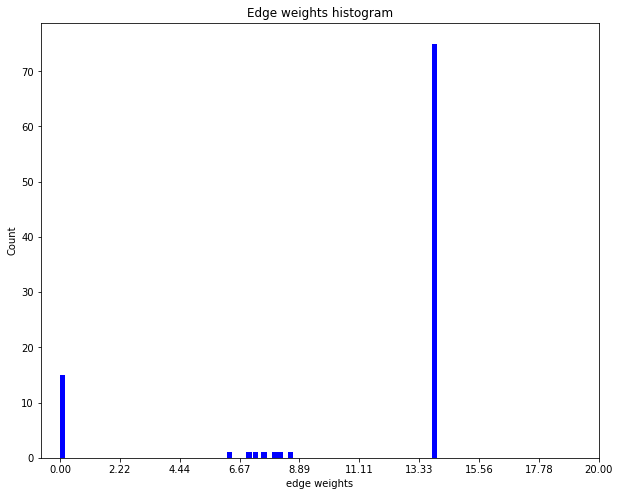

In [198]:
_, weights = G.edges(include_edge_weight=True)

wt, cnt = np.unique(weights, return_counts=True)

plt.figure(figsize=(10, 8))
plt.bar(wt, cnt, width=0.2, color="b")
plt.title("Edge weights histogram")
plt.ylabel("Count")
plt.xlabel("edge weights")
plt.xticks(np.linspace(0, 20, 10))

plt.show()

In [199]:
rw = BiasedRandomWalk(G)

In [200]:
weighted_walks = rw.run(
    nodes=G.nodes(),  # root nodes
    length=walk_length,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
    weighted=True,  # for weighted random walks
    seed=42,  # random seed fixed for reproducibility
)
print("Number of random walks: {}".format(len(weighted_walks)))

Number of random walks: 1150


In [201]:
weighted_model = Word2Vec(
    weighted_walks, size=128, window=5, min_count=0, sg=1, workers=1, iter=1
)

In [203]:
# Retrieve node embeddings and corresponding subjects
node_ids = weighted_model.wv.index2word  # list of node IDs
weighted_node_embeddings = (
    weighted_model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
# the gensim ordering may not match the StellarGraph one, so rearrange
node_targets = subjects.loc[node_ids].astype("category")

NameError: name 'subjects' is not defined

In [ ]:
# http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/fpgrowth/
import os
import operator
from pathlib import Path
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd
import math

# ----
def fp_growth_input_per_patient_python(disease_name, disease_df, word_dict, min_support, label):
    
    # For dataframe
    patient_id_lst = []
    patient_cooc_lst = []
    patient_cooc_minsup_lst = []
    patient_label_lst = []
    patient_note_cnt = []
    patient_feature_lst = []
    patient_feature_idx_lst = []
    patinet_log_odd_ratio_lst = []
    
    # --------------    
    patient_id = -1
    note_cnt = 0
    patient_note_list = []
    
    # read line in from file (each line is one note)
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        
        # only regard certain type of notes
        patient_id_check = int(row['SUBJECT_ID_x'])
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        patient_word_set = set()
    
#         print(f"patient_id_check: {patient_id_check}, patient_id: {patient_id}")
        # if patient id has changed, end sequence and start new sequence
        if not patient_id == patient_id_check and not patient_id == -1:
            te = TransactionEncoder()
            te_ary = te.fit(patient_note_list).transform(patient_note_list)
            df = pd.DataFrame(te_ary, columns=te.columns_)
            df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
            
            cooc_tmp = []
            cooc_minsup_tmp = []
            cooc_feature_tmp = []
            cooc_feature_idx_tmp = []
            cooc_log_odds_ratio_tmp = []
            
            for index, row in df_itemsets.iterrows():
                if len(row['itemsets']) == 1:
                    word = list(row['itemsets'])[0]
                    min_sup = row['support']
                    cooc_feature_tmp.append(min_sup)
                    cooc_feature_idx_tmp.append(word)
                    cooc_log_odds_ratio_tmp.append(math.log(min_sup/((1-min_sup) + 0.0001)))
                    
                if len(row['itemsets']) == 2:
                    cooc_ = list(row['itemsets'])
                    cooc_tmp.append(cooc_)
                    cooc_minsup_tmp.append(row['support'])
            
#             for index, row in df_itemsets.iterrows():
#                 if len(row['itemsets']) == 1:
#                     word = list(row['itemsets'])[0]
#                     min_sup = row['support']
#                     if word not in word_dict_df:
#                         word_dict_df[word] = min_sup
                    
#                 if len(row['itemsets']) == 2:
#                     cooc_ = list(row['itemsets'])
#                     cooc_tmp.append([[cooc_[0], word_dict_df[cooc_[0]]], [cooc_[1], word_dict_df[cooc_[1]]]])
#                     cooc_minsup_tmp.append(row['support'])
                    
          
            # Update glob lists
            patient_id_lst.append(patient_id)
            patient_cooc_lst.append(cooc_tmp)
            patient_cooc_minsup_lst.append(cooc_minsup_tmp)
            patient_label_lst.append(label)
            patient_note_cnt.append(note_cnt)
            
            patient_feature_lst.append(cooc_feature_tmp)
            patient_feature_idx_lst.append(cooc_feature_idx_tmp)
            patinet_log_odd_ratio_lst.append(cooc_log_odds_ratio_tmp)
            
            # Reset local lists
            patient_note_list = []
            note_cnt = 0
                    
        # update patient id
        patient_id = patient_id_check
        tokenized_note = word_tokenize(note)
        note_cnt += 1

        # loop through each word in note to count word belonging to each disease
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())       
            if stemmed_word in word_dict:
                    patient_word_set.add(stemmed_word)

        templst = []
        for word in patient_word_set:
            templst.append(word)

        if templst:
            patient_note_list.append(templst)
    
    # Last patient info
    te = TransactionEncoder()
    te_ary = te.fit(patient_note_list).transform(patient_note_list)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    df_itemsets = fpgrowth(df, min_support=min_support, use_colnames=True)
            
    cooc_tmp = []
    cooc_minsup_tmp = []
    #-----
    cooc_feature_tmp = []
    cooc_feature_idx_tmp = []
    cooc_log_odds_ratio_tmp = []
            
    for index, row in df_itemsets.iterrows():
        if len(row['itemsets']) == 1:
            word = list(row['itemsets'])[0]
            min_sup = row['support']
            cooc_feature_tmp.append(min_sup)
            cooc_feature_idx_tmp.append(word)
            cooc_log_odds_ratio_tmp.append(math.log(min_sup/((1-min_sup) + 0.0001)))
    #-----
            
    for index, row in df_itemsets.iterrows():
        if len(row['itemsets']) == 2:
            cooc_tmp.append(row['itemsets'])
            cooc_minsup_tmp.append(row['support'])
                    
            
    # Update glob lists
    patient_id_lst.append(patient_id)
    patient_cooc_lst.append(cooc_tmp)
    patient_cooc_minsup_lst.append(cooc_minsup_tmp)
    patient_label_lst.append(label)
    patient_note_cnt.append(note_cnt)
    
    patient_feature_lst.append(cooc_feature_tmp)
    patient_feature_idx_lst.append(cooc_feature_idx_tmp)
    patinet_log_odd_ratio_lst.append(cooc_log_odds_ratio_tmp)
    
#     print(f"patient_id_lst: {len(patient_id_lst)} patient_cooc_lst: {len(patient_cooc_lst)} patient_cooc_minsup_lst: {len(patient_cooc_minsup_lst)} patient_label_lst: {len(patient_label_lst)} patient_note_cnt: {len(patient_note_cnt)}")
    print("FP growth input for " + disease_name + " generated!")
    return pd.DataFrame({"patient_id":patient_id_lst, "patient_cooc":patient_cooc_lst, "cooc_minsup":patient_cooc_minsup_lst, "cooc_feature":patient_feature_lst, "log_odd_ratio":patinet_log_odd_ratio_lst, "cooc_feature_idx":patient_feature_idx_lst ,"label":patient_label_lst, "note_cnt":patient_note_cnt})

pneumonia_dead_cooc_df = fp_growth_input_per_patient_python("pneumonia_dead", pneumonia_dead_no_disch, word_dict, 0.4, -1)
pneumonia_alive_cooc_df = fp_growth_input_per_patient_python("pneumonia_alive", pneumonia_alive_no_disch, word_dict, 0.4, 1)

In [ ]:
pneumonia_dead_cooc_df

In [ ]:
cnt_ = 0
for i, (index, row) in enumerate(pneumonia_dead_cooc_df.iterrows()):
    if row['patient_cooc']:
        cnt_ += 1
print(cnt_)
# 230 min_sup = 0.1
# 74 min_sup = 0.4
# 94 min_sup = 0.3

In [ ]:
pneumonia_alive_cooc_df

In [ ]:
cnt_ = 0
for i, (index, row) in enumerate(pneumonia_alive_cooc_df.iterrows()):
    if row['patient_cooc']:
        cnt_ += 1
print(cnt_)
# 763 min_sup = 0.1
# 230 min_sup = 0.4
# 381 min_sup = 0.3

### Train the model

In [ ]:
import pandas as pd
import numpy as np

import stellargraph as sg
from stellargraph.mapper import PaddedGraphGenerator
from stellargraph.layer import GCNSupervisedGraphClassification
from stellargraph import StellarGraph

from stellargraph import datasets

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
# https://medium.com/@kegui/how-do-i-know-i-am-running-keras-model-on-gpu-a9cdcc24f986
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

### Load the data

In [ ]:
from stellargraph import StellarGraph

def create_graph_list(pd_df):
    graphs = []
    labels = []

    for index, row in pd_df.iterrows():
        if row['patient_cooc']:
            source = []
            target = []
            edge_feature = []
            
            feature_node = []
            feature_idx = []
            
            for cooc in row['patient_cooc']:
                source.append(cooc[0])
                target.append(cooc[1])
                
            for feature in row['cooc_minsup']:
                edge_feature.append(feature)
            
            # Node feature and index
            for node_feature in row['log_odd_ratio']:
                feature_node.append(node_feature)
                
            for node_idx in row['cooc_feature_idx']:
                feature_idx.append(node_idx)
                
#             print("source:", source)
#             print("target:", target)
#             print("edge_feature", edge_feature)
            
#             square_edges = pd.DataFrame({"source": source, "target": target, "edge_feature":edge_feature})
            square_node_data = pd.DataFrame({"feature_src":feature_node}, index=feature_idx)
            square_edges = pd.DataFrame({"source": source, "target": target})
          
            square = StellarGraph(square_node_data, square_edges)
            graphs.append(square)
            labels.append(row['label'])
#             break
            
            
    return graphs, labels

graphs = []
labels = []
features = []

graph_1, label_1 = create_graph_list(pneumonia_dead_cooc_df)
graph_2, label_2 = create_graph_list(pneumonia_alive_cooc_df)

graphs.extend(graph_1)
labels.extend(label_1)
print(f"graphs: {len(graphs)}, labels: {len(labels)}")
graphs.extend(graph_2)
labels.extend(label_2)
print(f"graphs: {len(graphs)}, labels: {len(labels)}")

In [ ]:
print(graphs[0].info())

In [ ]:
print(graphs[1].info())

In [ ]:
summary = pd.DataFrame(
    [(g.number_of_nodes(), g.number_of_edges()) for g in graphs],
    columns=["nodes", "edges"],
)
summary.describe().round(1)

In [ ]:
graph_labels = pd.Series(labels)

In [ ]:
print(graph_labels)

In [ ]:
graph_labels.value_counts().to_frame()

In [ ]:
graph_labels = pd.get_dummies(graph_labels, drop_first=True)

In [ ]:
print(type(graph_labels))

In [ ]:
graph_labels

In [ ]:
generator = PaddedGraphGenerator(graphs=graphs)

In [ ]:
def create_graph_classification_model(generator):
    gc_model = GCNSupervisedGraphClassification(
        layer_sizes=[64, 64],
        activations=["relu", "relu"],
        generator=generator,
        dropout=0.5,
    )
    x_inp, x_out = gc_model.in_out_tensors()
    predictions = Dense(units=32, activation="relu")(x_out)
    predictions = Dense(units=16, activation="relu")(predictions)
    predictions = Dense(units=1, activation="sigmoid")(predictions)

    # Let's create the Keras model and prepare it for training
    model = Model(inputs=x_inp, outputs=predictions)
    model.compile(optimizer=Adam(0.005), loss=binary_crossentropy, metrics=["acc"])

    return model

### Train the model

We can now train the model using the model's `fit` method. First, we specify some important training parameters such as the number of training epochs, number of fold for cross validation and the number of time to repeat cross validation.

In [ ]:
epochs = 200  # maximum number of training epochs
folds = 10  # the number of folds for k-fold cross validation
n_repeats = 5  # the number of repeats for repeated k-fold cross validation

In [ ]:
es = EarlyStopping(
    monitor="val_loss", min_delta=0, patience=25, restore_best_weights=True
)

In [ ]:
def train_fold(model, train_gen, test_gen, es, epochs):
    history = model.fit(
        train_gen, epochs=epochs, validation_data=test_gen, verbose=0, callbacks=[es],
    )
    # calculate performance on the test data and return along with history
    test_metrics = model.evaluate(test_gen, verbose=0)
    test_acc = test_metrics[model.metrics_names.index("acc")]

    return history, test_acc

In [ ]:
def get_generators(train_index, test_index, graph_labels, batch_size):
    train_gen = generator.flow(
        train_index, targets=graph_labels.iloc[train_index].values, batch_size=batch_size
    )
    test_gen = generator.flow(
        test_index, targets=graph_labels.iloc[test_index].values, batch_size=batch_size
    )

    return train_gen, test_gen

In [ ]:
test_accs = []

stratified_folds = model_selection.RepeatedStratifiedKFold(
    n_splits=folds, n_repeats=n_repeats
).split(graph_labels, graph_labels)

for i, (train_index, test_index) in enumerate(stratified_folds):
    print(f"Training and evaluating on fold {i+1} out of {folds * n_repeats}...")
    train_gen, test_gen = get_generators(
        train_index, test_index, graph_labels, batch_size=30
    )

    model = create_graph_classification_model(generator)

    history, acc = train_fold(model, train_gen, test_gen, es, epochs)

    test_accs.append(acc)

In [ ]:
print(f"Accuracy over all folds mean: {np.mean(test_accs)*100:.3}% and std: {np.std(test_accs)*100:.2}%")

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(test_accs)
plt.xlabel("Accuracy")
plt.ylabel("Count")

### Implementation for spmf java

In [ ]:
import operator

"""function description:
generates patient word itemset for each disease
"""
# # define stemmer
# stemmer = PorterStemmer()

def generate_FP_input_per_note(disease_name, disease_df, word_dict):
    with open(disease_name, "w") as output_fp:

        # write the coverted dic for the text
        # od = collections.OrderedDict(sorted(word_dict.items()))
        od = sorted(word_dict.items(), key = operator.itemgetter(1))
        output_fp.write("@CONVERTED_FROM_TEXT")
        output_fp.write("\n")
        # for k, v in od.iteritems():
        for k,v in od:
            output_fp.write("@ITEM=")
            output_fp.write(str(v))
            output_fp.write("=")
            output_fp.write(str(k))
            output_fp.write("\n")

        # read line in from file (each line is one note)
        for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
            # if not "Physician" in line[4]:
            #     continue
                    
            word_set = set()
            note = row['TEXT']

            tokenized_note = word_tokenize(note)

            # loop through each word in note to count word belonging to each disease
            for word in tokenized_note:
                stemmed_word = stemmer.stem(word.lower())
                if stemmed_word in word_dict:
                    word_set.add(stemmed_word)

            templst = []
            for word in word_set:
                templst.append(word_dict[word])

            templst.sort()
            for x in range(len(templst) - 1):
                output_fp.write(str(templst[x]) + " ")

            if templst:
                output_fp.write(str(templst[len(templst)-1]))
                output_fp.write("\n")
            
    print("FP growth input for " + disease_name + " generated!")

# Given as a parameter
generate_FP_input_per_note("pneumonia_dead", pneumonia_dead_no_disch, word_dict)
generate_FP_input_per_note("pneumonia_alive", pneumonia_alive_no_disch, word_dict)


In [ ]:
import os
import operator
from pathlib import Path

# ----
def fp_growth_input_per_patient(disease_name, disease_df, word_dict):
    
    disease_path = os.path.join("./tmp", disease_name, "inputs")
    if not os.path.exists(disease_path):
        os.makedirs(disease_path)
        
    patient_id = -1
#     patient_word_set = set()
    patient_note_list = []
    
    # read line in from file (each line is one note)
    for index, row in tqdm(disease_df.iterrows(), total=disease_df.shape[0]):
        # only regard certain type of notes
        patient_id_check = int(row['SUBJECT_ID_x'])
        note = re.sub(r'\[\*\*(.*?)\*\*\]|[_,\d\*:~=\.\-\+\\/]+', ' ', row['TEXT'])
        patient_word_set = set()
    
#         print(f"patient_id_check: {patient_id_check}, patient_id: {patient_id}")
        # if patient id has changed, end sequence and start new sequence
        if not patient_id == patient_id_check and not patient_id == -1:
        
#             disease_path = "./tmp/" + disease_name
            file_name = str(patient_id) + '_' + disease_name
            file_path = os.path.join(disease_path, file_name)
            
            with open(file_path, "w") as output_fp:
                # write the coverted dic for the text
                # od = collections.OrderedDict(sorted(word_dict.items()))
    
                od = sorted(word_dict.items(), key = operator.itemgetter(1))
                output_fp.write("@CONVERTED_FROM_TEXT")
                output_fp.write("\n")
                # for k, v in od.iteritems():
                for k,v in od:
                    output_fp.write("@ITEM=")
                    output_fp.write(str(v))
                    output_fp.write("=")
                    output_fp.write(str(k))
                    output_fp.write("\n")

                for item in patient_note_list:
                    for x in range(len(item) - 1):
                        output_fp.write(str(item[x]) + " ")

                    if item:
                        output_fp.write(str(item[len(item)-1]))
                        output_fp.write("\n")

                patient_note_list = []
                

                    
        # update patient id
        patient_id = patient_id_check
        tokenized_note = word_tokenize(note)

        # loop through each word in note to count word belonging to each disease
        for word in tokenized_note:
            stemmed_word = stemmer.stem(word.lower())       
            if stemmed_word in word_dict:
                    patient_word_set.add(stemmed_word)

        templst = []
        for word in patient_word_set:
            templst.append(word_dict[word])

        templst.sort()
        patient_note_list.append(templst)
        
            
    print("FP growth input for " + disease_name + " generated!")

fp_growth_input_per_patient("pneumonia_dead", pneumonia_dead_no_disch, word_dict)
fp_growth_input_per_patient("pneumonia_alive", pneumonia_alive_no_disch, word_dict)



In [ ]:
import os, subprocess
print(os.getcwd())
os.system('ls -l')
# process = subprocess.Popen(["java -jar spmf run FPGrowth_itemsets pneumonia_dead FP_out_test 3%"])
# process.wait()

In [ ]:
import os, subprocess
from tqdm import tqdm
def fp_growth_output_per_pratient(disease_name):
#     spmf = ['java', '-jar', 'spmf.jar', 'run', 'FPGrowth_itemsets']
    minsup = '70%'
    inputdir = os.path.join("./tmp", disease_name, "inputs")
    
    outputdir = os.path.join("./tmp", disease_name, "outputs")
    if not os.path.exists(outputdir):
        os.makedirs(outputdir)
        
    for patient_file in tqdm(os.listdir(inputdir)):
#         print(patient_file)
        input_ = os.path.join(inputdir, patient_file)
        output_ = os.path.join(outputdir, patient_file)
#         print(f"input_: {input_}")
#         print(f"output_: {output_}")
        command = ['java', '-jar', 'spmf.jar', 'run', 'FPGrowth_itemsets', input_, output_, minsup]
#         print(f"command: {command}")
        subprocess.call(command)

        

fp_growth_output_per_pratient("pneumonia_dead")
fp_growth_output_per_pratient("pneumonia_alive")
    

In [ ]:
def findItemSets(fileName, length_OfItemSet):

    file_read = fileName
    lengthOfItemSet = int(length_OfItemSet)

    wordlst = []
    with open(file_read, "r") as fp:
        for line in fp:
            line = line.split()
            if line:
                wordlst.append(line)

    coocurrencies = []

    for listitem in wordlst:

        if len(listitem) == (lengthOfItemSet + 2):
            coocurrencies.append(listitem)

    output = sorted(coocurrencies, key=lambda x: int(x[-1]))


    for x in reversed(output):
        if lengthOfItemSet == 2:
            print("%s %s %s" % (x[0], x[1], x[3]))
        elif lengthOfItemSet == 3:
            print("%s %s %s %s" % (x[0], x[1], x[2], x[4]))
        elif lengthOfItemSet == 4:
            print("%s %s %s %s %s" % (x[0], x[1], x[2], x[3], x[5]))
        elif lengthOfItemSet == 5:
            print("%s %s %s %s %s %s" % (x[0], x[1], x[2], x[3], x[4], x[6]))
            
# findItemSets('FP_growth_pneumonia_alive_output.txt', 2)
findItemSets('./tmp/111_out.txt', 2)